### a

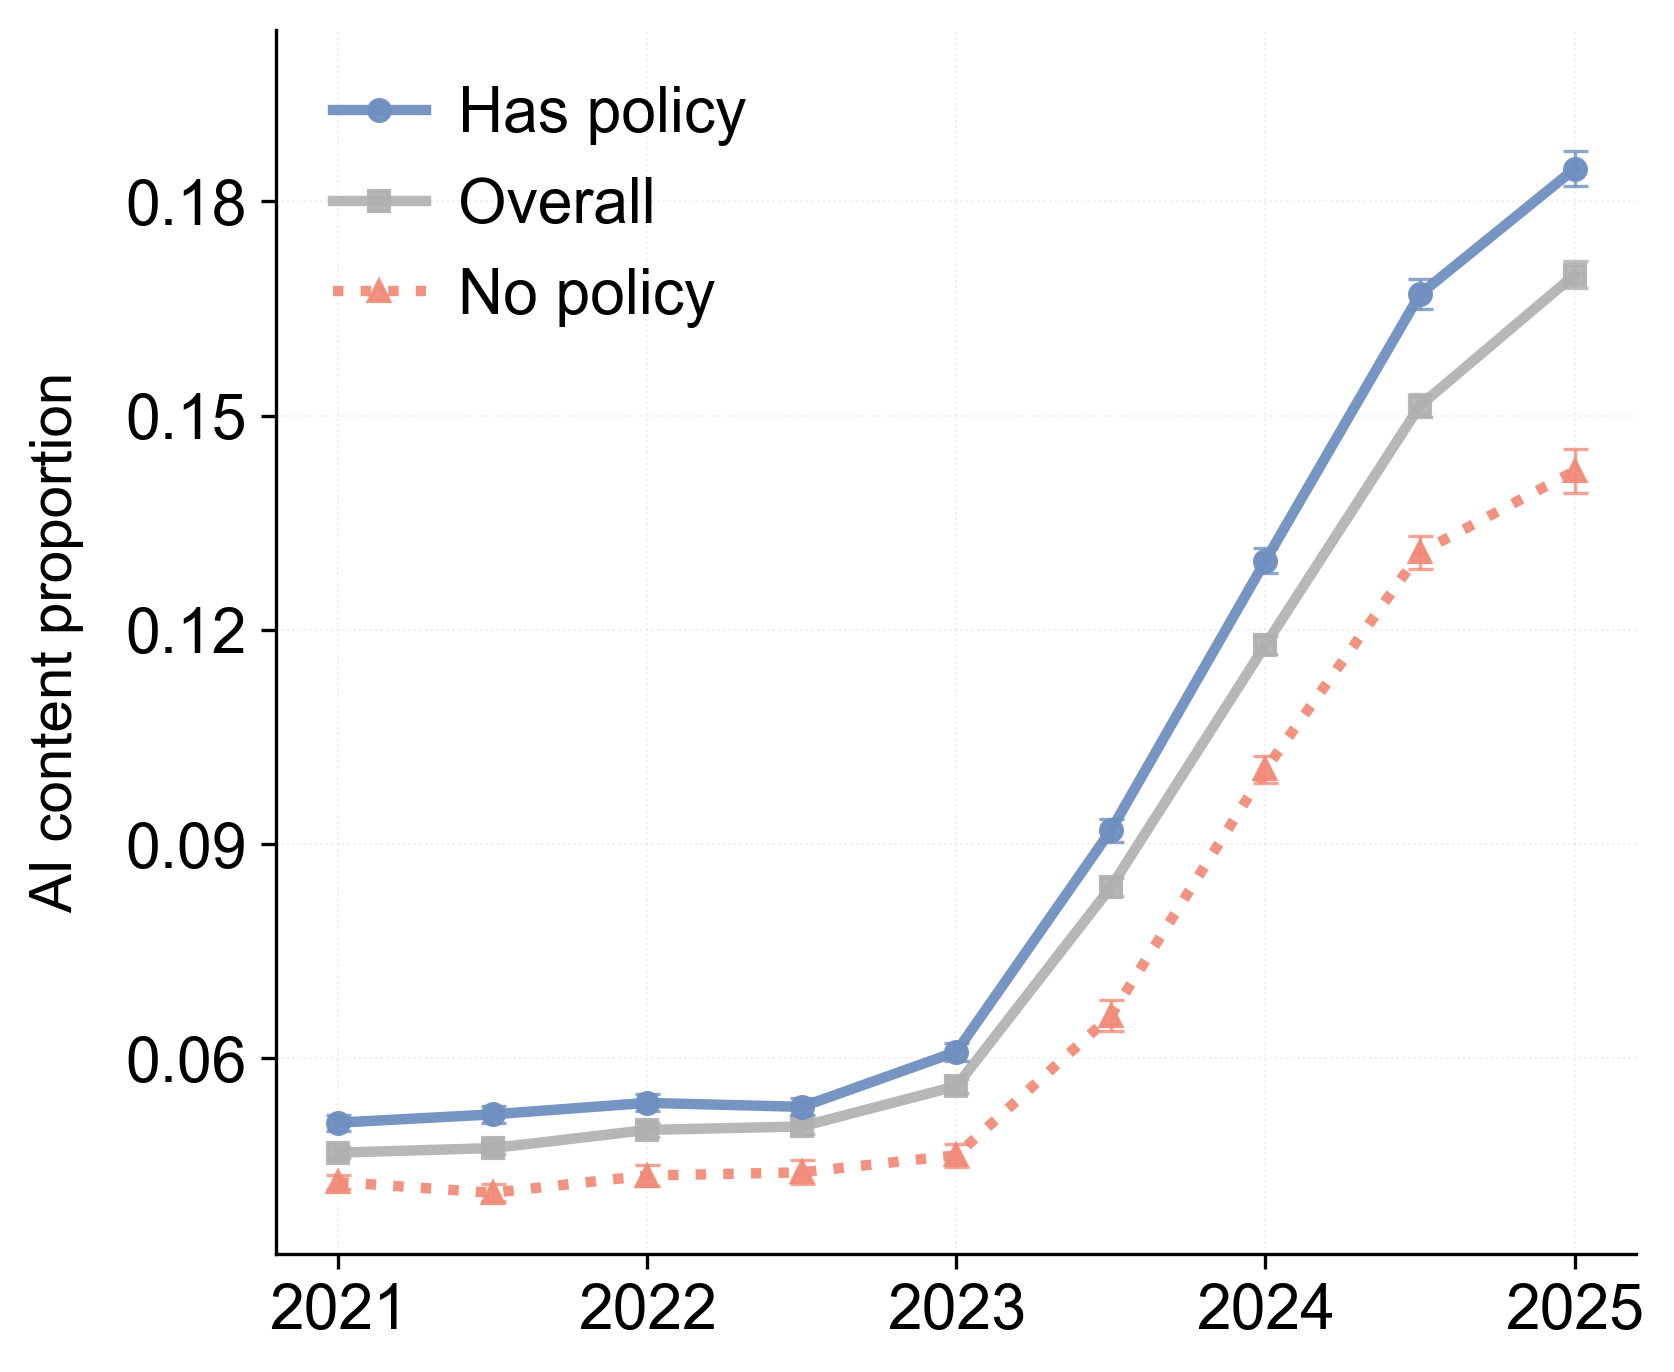

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

overall_path = r"ai_policy/results/mle_res/by_half_year.csv"
policy_path  = r"ai_policy/results/mle_res/by_half_year_policy.csv"

overall = pd.read_csv(overall_path)  
policy  = pd.read_csv(policy_path)

h_order = {'H1': 1, 'H2': 2}

overall_sorted = overall.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in overall_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_overall(y, h):
    row = overall[(overall["year"] == y) & (overall["half_year"] == h)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

def pick_policy(y, h, has_policy):
    row = policy[(policy["year"] == y) & (policy["half_year"] == h) & (policy["has_ai_policy"] == has_policy)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

overall_mean, overall_lo, overall_hi = zip(*[pick_overall(y, h) for y, h in periods])
true_mean, true_lo, true_hi         = zip(*[pick_policy(y, h, True)  for y, h in periods])
false_mean, false_lo, false_hi      = zip(*[pick_policy(y, h, False) for y, h in periods])

overall_mean = np.array(overall_mean, dtype=float)
true_mean    = np.array(true_mean, dtype=float)
false_mean   = np.array(false_mean, dtype=float)
def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

colors = {'with': '#6f8fc0', 'without': '#f28c7a', 'overall': '#b0b0b0'}

fig, ax = plt.subplots(figsize=(6, 5))

# Overall
ax.plot(x, overall_mean, marker='s', markersize=5, linestyle='-', color=colors['overall'],
        label='Overall', alpha=0.9, zorder=3)
ax.errorbar(x, overall_mean,
            yerr=[overall_mean - np.array(overall_lo), np.array(overall_hi) - overall_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['overall'],
            elinewidth=0.8, alpha=0.8, zorder=2)

# With policy
ax.plot(x, true_mean, marker='o', markersize=5, linestyle='-', color=colors['with'],
        label='Has policy', zorder=4, alpha=0.95)
ax.errorbar(x, true_mean,
            yerr=[true_mean - np.array(true_lo), np.array(true_hi) - true_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['with'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# Without policy
ax.plot(x, false_mean, marker='^', markersize=5, linestyle=':', color=colors['without'],
        label='No policy', zorder=4, alpha=0.95)
ax.errorbar(x, false_mean,
            yerr=[false_mean - np.array(false_lo), np.array(false_hi) - false_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['without'],
            elinewidth=0.8, alpha=0.8, zorder=3)

year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]  # With policy, Overall, Without policy
ax.legend([handles[i] for i in order], [labels[i] for i in order],
          frameon=False, loc='best', ncol=1, handletextpad=0.5, columnspacing=1.0, handlelength=1.5)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('overrall')
plt.show()


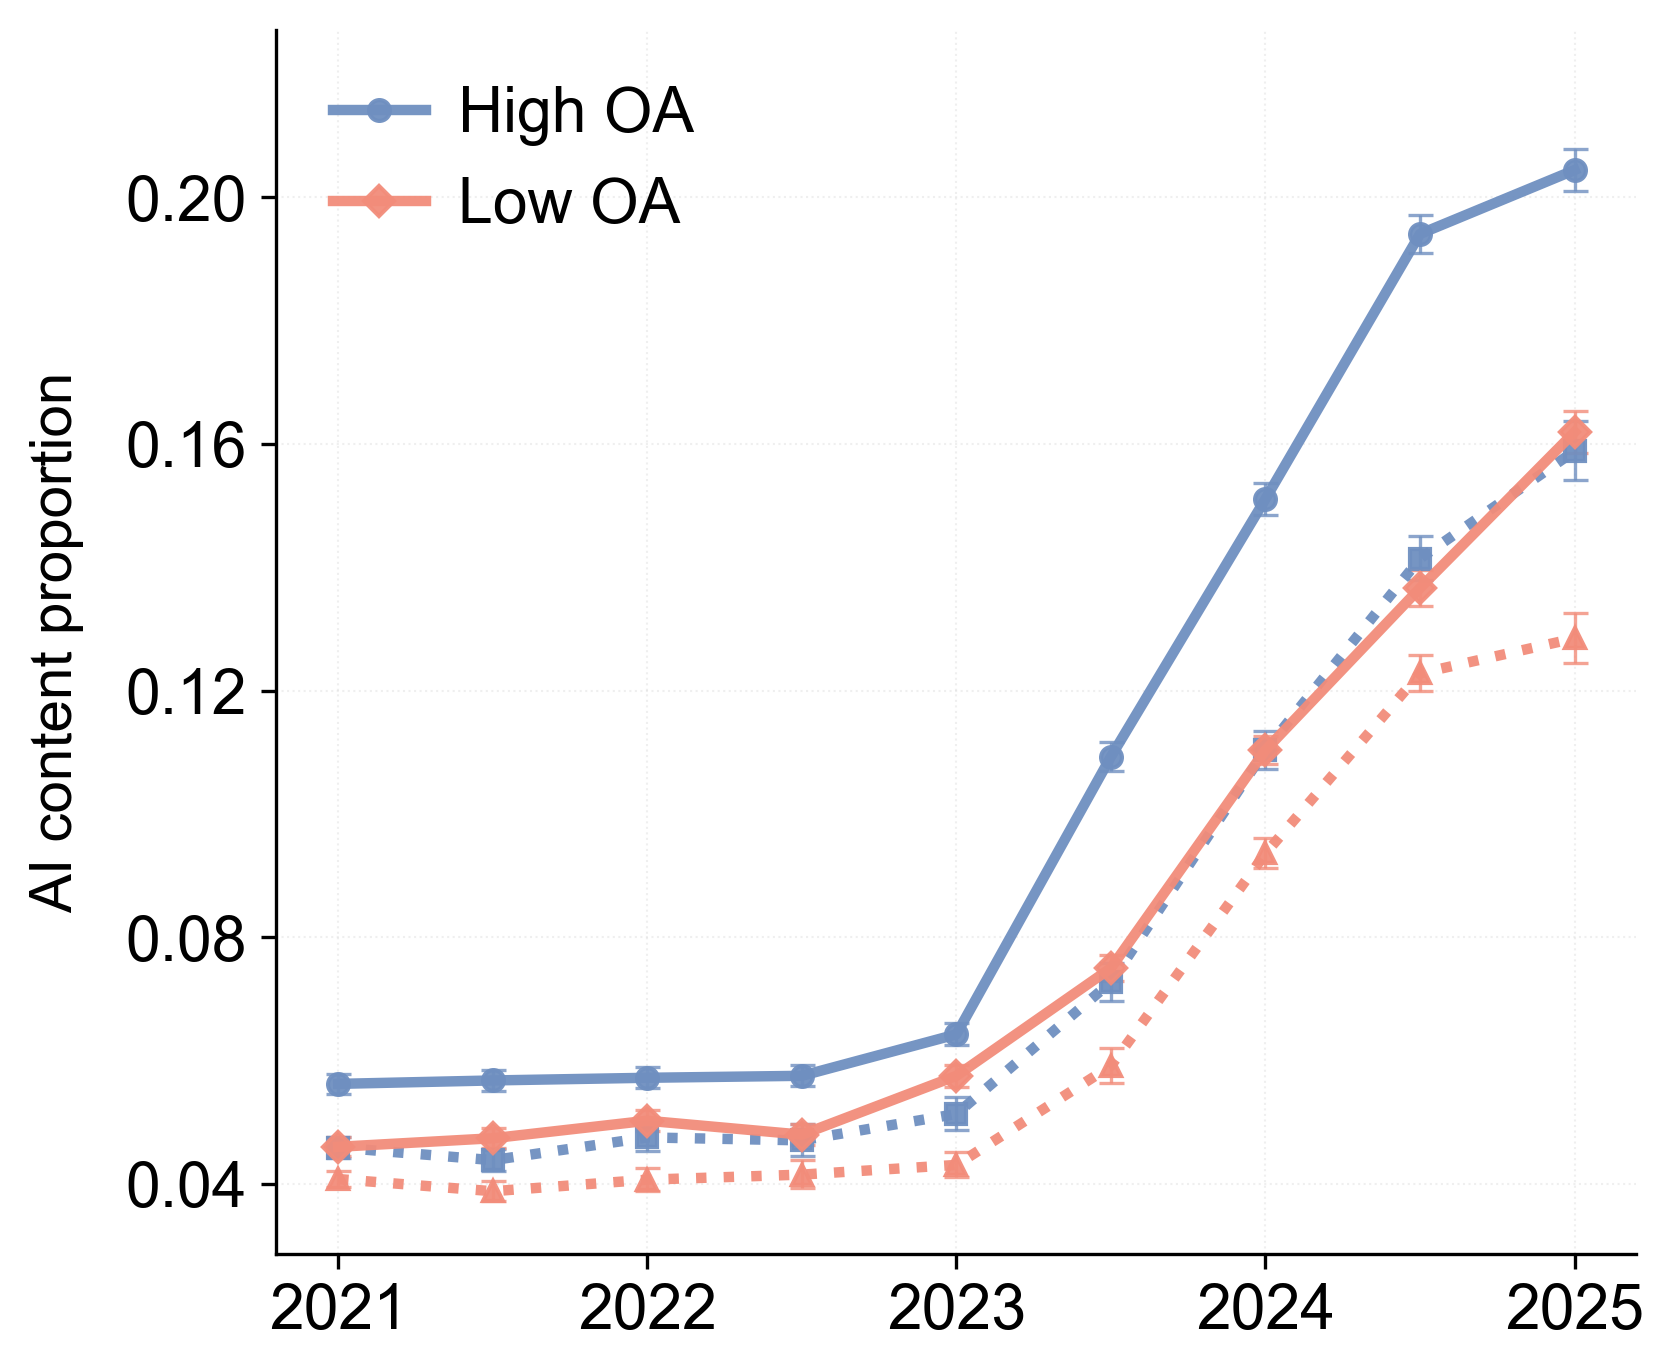

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# Load data
oa_policy_path = r"ai_policy/results/mle_res/by_half_year_oa_policy.csv"
data = pd.read_csv(oa_policy_path)

# Sort by half-year
h_order = {'H1': 1, 'H2': 2}
data_sorted = data.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)

# Get time periods
periods = [(int(r.year), r.half_year) for _, r in data_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
periods = sorted(list(set(periods)))  # Remove duplicates and sort
x = np.arange(len(periods))

def pick_data(y, h, has_policy, is_oa):
    """Extract data under specific conditions"""
    row = data[(data["year"] == y) & (data["half_year"] == h) & 
              (data["has_ai_policy"] == has_policy) & (data["is_oa"] == is_oa)]
    if row.empty: 
        return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

# Extract data for four lines
oa_policy_mean, oa_policy_lo, oa_policy_hi = zip(*[pick_data(y, h, True, True) for y, h in periods])      # OA + with policy
oa_no_policy_mean, oa_no_policy_lo, oa_no_policy_hi = zip(*[pick_data(y, h, False, True) for y, h in periods])  # OA + no policy
non_oa_policy_mean, non_oa_policy_lo, non_oa_policy_hi = zip(*[pick_data(y, h, True, False) for y, h in periods])     # Non-OA + with policy
non_oa_no_policy_mean, non_oa_no_policy_lo, non_oa_no_policy_hi = zip(*[pick_data(y, h, False, False) for y, h in periods]) # Non-OA + no policy

# Convert to numpy arrays
oa_policy_mean = np.array(oa_policy_mean, dtype=float)
oa_no_policy_mean = np.array(oa_no_policy_mean, dtype=float)
non_oa_policy_mean = np.array(non_oa_policy_mean, dtype=float)
non_oa_no_policy_mean = np.array(non_oa_no_policy_mean, dtype=float)

# Set plot style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Color settings: Different colors for OA and non-OA
colors = {'oa': '#6f8fc0', 'non_oa': '#f28c7a'}

fig, ax = plt.subplots(figsize=(6, 5))
# OA + with policy (solid line) - show only OA label
ax.plot(x, oa_policy_mean, marker='o', markersize=5, linestyle='-', color=colors['oa'],
        label='High OA', zorder=4, alpha=0.95)
ax.errorbar(x, oa_policy_mean,
            yerr=[oa_policy_mean - np.array(oa_policy_lo), np.array(oa_policy_hi) - oa_policy_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['oa'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# OA + no policy (dashed line) - remove label
ax.plot(x, oa_no_policy_mean, marker='s', markersize=5, linestyle=':', color=colors['oa'],
        zorder=4, alpha=0.95)
ax.errorbar(x, oa_no_policy_mean,
            yerr=[oa_no_policy_mean - np.array(oa_no_policy_lo), np.array(oa_no_policy_hi) - oa_no_policy_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['oa'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# Non-OA + with policy (solid line) - show only Non-OA label
ax.plot(x, non_oa_policy_mean, marker='D', markersize=5, linestyle='-', color=colors['non_oa'],
        label='Low OA', zorder=4, alpha=0.95)
ax.errorbar(x, non_oa_policy_mean,
            yerr=[non_oa_policy_mean - np.array(non_oa_policy_lo), np.array(non_oa_policy_hi) - non_oa_policy_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['non_oa'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# Non-OA + no policy (dashed line) - remove label
ax.plot(x, non_oa_no_policy_mean, marker='^', markersize=5, linestyle=':', color=colors['non_oa'],
        zorder=4, alpha=0.95)
ax.errorbar(x, non_oa_no_policy_mean,
            yerr=[non_oa_no_policy_mean - np.array(non_oa_no_policy_lo), np.array(non_oa_no_policy_hi) - non_oa_no_policy_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['non_oa'],
            elinewidth=0.8, alpha=0.8, zorder=3)
# # OA + with policy (solid line)
# ax.plot(x, oa_policy_mean, marker='o', markersize=5, linestyle='-', color=colors['oa'],
#         label='OA (With policy)', zorder=4, alpha=0.95)
# ax.errorbar(x, oa_policy_mean,
#             yerr=[oa_policy_mean - np.array(oa_policy_lo), np.array(oa_policy_hi) - oa_policy_mean],
#             fmt='none', capsize=3, capthick=0.8, ecolor=colors['oa'],
#             elinewidth=0.8, alpha=0.8, zorder=3)

# # OA + no policy (dashed line)
# ax.plot(x, oa_no_policy_mean, marker='s', markersize=5, linestyle=':', color=colors['oa'],
#         label='OA (Without policy)', zorder=4, alpha=0.95)
# ax.errorbar(x, oa_no_policy_mean,
#             yerr=[oa_no_policy_mean - np.array(oa_no_policy_lo), np.array(oa_no_policy_hi) - oa_no_policy_mean],
#             fmt='none', capsize=3, capthick=0.8, ecolor=colors['oa'],
#             elinewidth=0.8, alpha=0.8, zorder=3)

# # Non-OA + with policy (solid line)
# ax.plot(x, non_oa_policy_mean, marker='D', markersize=5, linestyle='-', color=colors['non_oa'],
#         label='Non-OA (With policy)', zorder=4, alpha=0.95)
# ax.errorbar(x, non_oa_policy_mean,
#             yerr=[non_oa_policy_mean - np.array(non_oa_policy_lo), np.array(non_oa_policy_hi) - non_oa_policy_mean],
#             fmt='none', capsize=3, capthick=0.8, ecolor=colors['non_oa'],
#             elinewidth=0.8, alpha=0.8, zorder=3)

# # Non-OA + no policy (dashed line)
# ax.plot(x, non_oa_no_policy_mean, marker='^', markersize=5, linestyle=':', color=colors['non_oa'],
#         label='Non-OA (Without policy)', zorder=4, alpha=0.95)
# ax.errorbar(x, non_oa_no_policy_mean,
#             yerr=[non_oa_no_policy_mean - np.array(non_oa_no_policy_lo), np.array(non_oa_no_policy_hi) - non_oa_no_policy_mean],
#             fmt='none', capsize=3, capthick=0.8, ecolor=colors['non_oa'],
#             elinewidth=0.8, alpha=0.8, zorder=3)

# Set X-axis labels
year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

# Set axis and plot style
ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Set legend
ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, 
          columnspacing=1.0, handlelength=1.5)

# Adjust Y-axis range
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('oa')
plt.show()



C:\Users\ningji\AppData\Local\Temp\ipykernel_18584\3502324860.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_stats = policy_country_data.groupby(['year', 'half_year', 'has_ai_policy', 'is_english']).apply(calculate_weighted_stats).reset_index()


修正后的置信区间:
  Period 0: mean=0.0579, ci_lower=0.0560, ci_upper=0.0597, width=0.0038
  Period 1: mean=0.0603, ci_lower=0.0584, ci_upper=0.0622, width=0.0038
  Period 2: mean=0.0632, ci_lower=0.0612, ci_upper=0.0651, width=0.0039


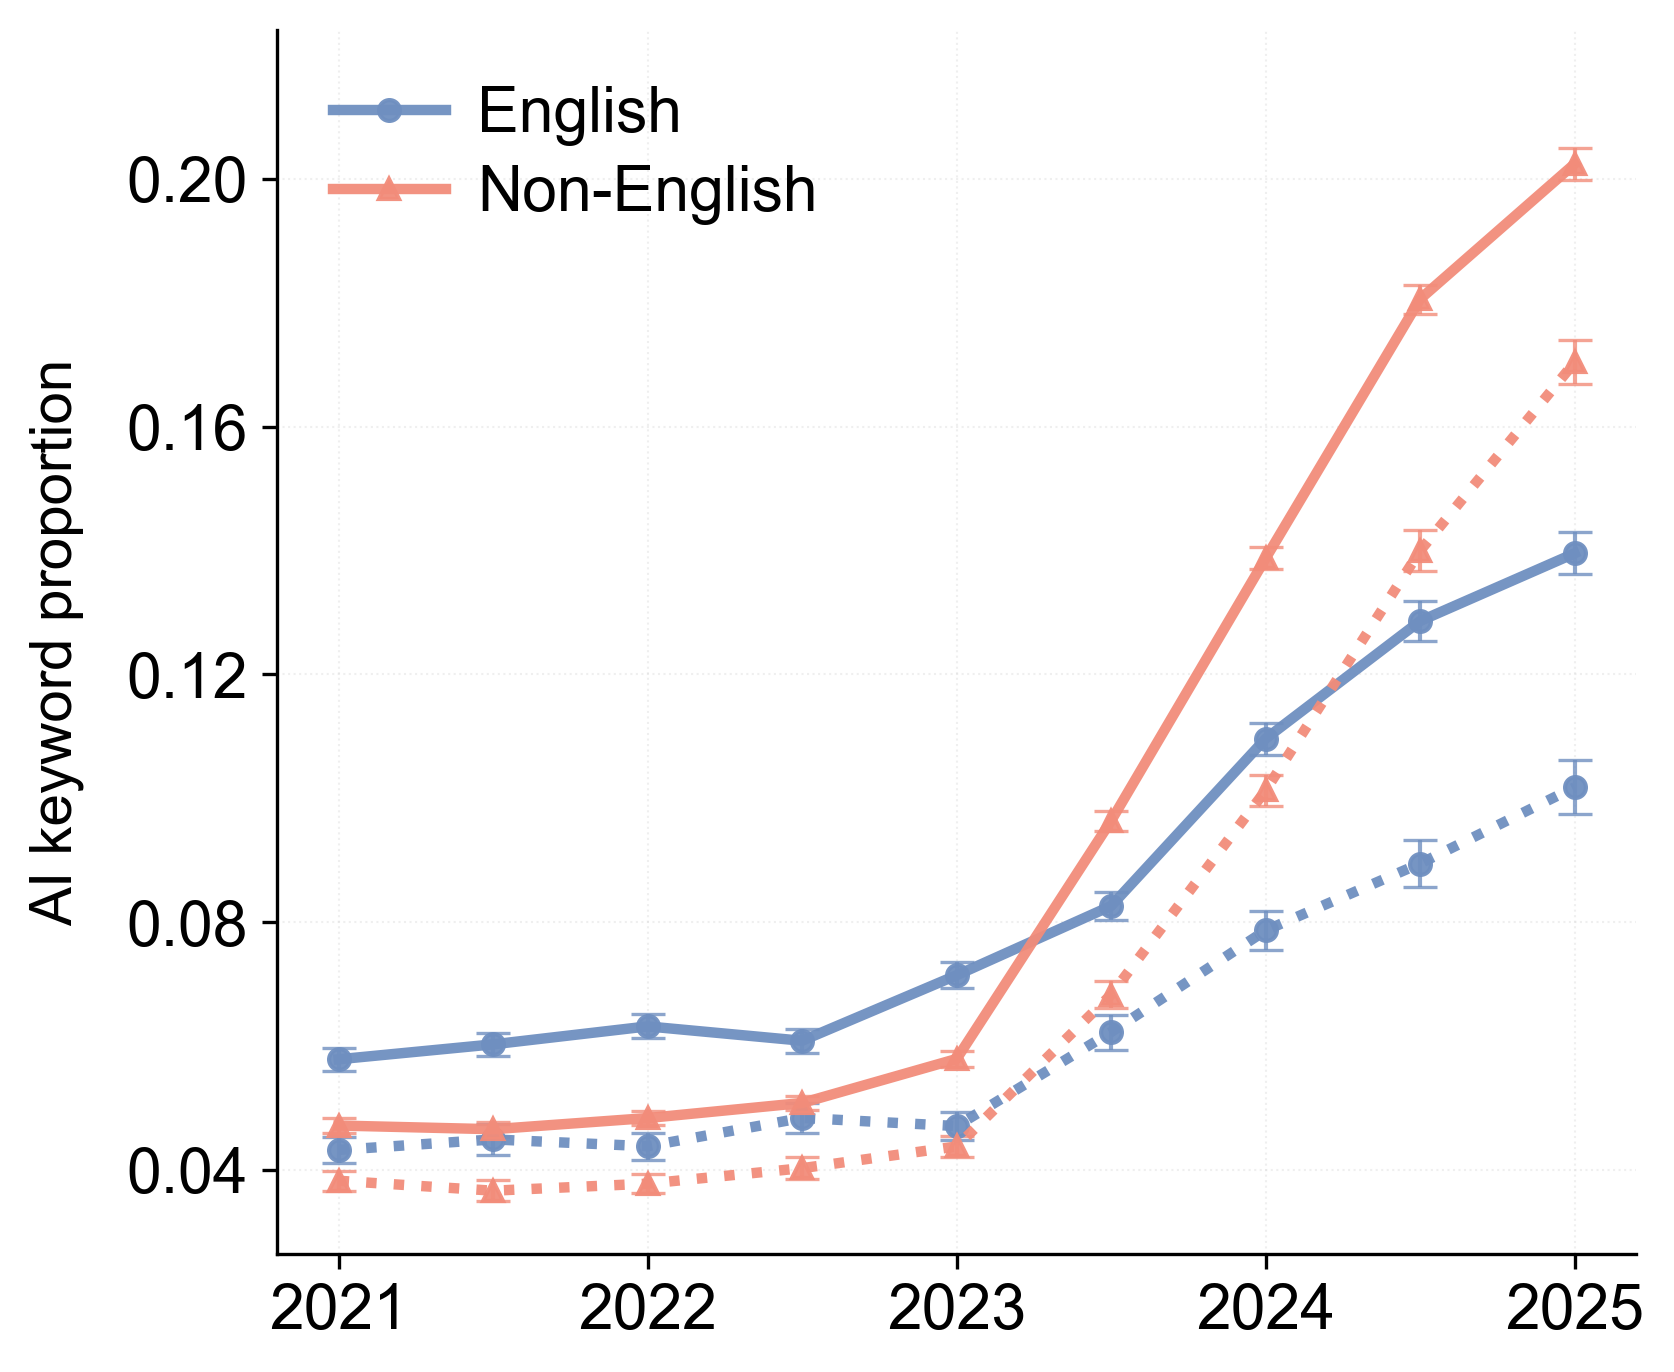

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# English-speaking countries mapping (ISO 2-letter codes) based on official data
english_speaking_countries = {
    'AU', 'BM', 'CA', 'FK', 'GI', 'GG', 'GY', 'IE', 'IM', 'JE', 'NZ', 'SG', 'ZA', 'GB', 'US', 'VI',
    'AG', 'AI', 'BS', 'BB', 'VG', 'KY', 'DM', 'GD', 'VC', 'JM', 'MS', 'KN', 'LC', 'TT', 'TC'
}

# Load data with policy information
policy_country_path = r"ai_policy/results/mle_res/by_half_year_policy_country.csv"
policy_country_data = pd.read_csv(policy_country_path)

# Filter out missing country codes
policy_country_data = policy_country_data.dropna(subset=['country_list'])

# Add language classification column
policy_country_data['is_english'] = policy_country_data['country_list'].isin(english_speaking_countries)

# Corrected weighted calculation method
def calculate_weighted_stats(group):
    # Filter out extreme_estimate data as their confidence intervals are unreliable
    valid_group = group[group['warning'] != 'extreme_estimate'].copy()
    
    if len(valid_group) == 0:
        return pd.Series({
            'count': 0,
            'mean': np.nan,
            'ci_lower': np.nan,
            'ci_upper': np.nan
        })
    
    # Use sample size as weights
    weights = valid_group['count']
    total_weight = weights.sum()
    
    if total_weight == 0:
        return pd.Series({
            'count': 0,
            'mean': np.nan,
            'ci_lower': np.nan,
            'ci_upper': np.nan
        })
    
    # Weighted average
    weighted_mean = (valid_group['mean'] * weights).sum() / total_weight
    
    # Use correct standard error propagation formula
    # For weighted average, standard error = sqrt(sum(weight^2 * se^2)) / sum(weight)
    weighted_se_squared = ((weights ** 2) * (valid_group['se'] ** 2)).sum() / (total_weight ** 2)
    weighted_se = np.sqrt(weighted_se_squared)
    
    # Calculate 95% confidence interval
    ci_lower = max(0, weighted_mean - 1.96 * weighted_se)
    ci_upper = min(1, weighted_mean + 1.96 * weighted_se)
    
    return pd.Series({
        'count': int(total_weight),
        'mean': weighted_mean,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    })

# Group statistics - remove include_groups parameter
grouped_stats = policy_country_data.groupby(['year', 'half_year', 'has_ai_policy', 'is_english']).apply(calculate_weighted_stats).reset_index()

h_order = {'H1': 1, 'H2': 2}

# Get time periods (exclude 2025 H2)
years_halfyears = policy_country_data[['year', 'half_year']].drop_duplicates()
years_halfyears_sorted = years_halfyears.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in years_halfyears_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_group(y, h, has_policy, is_english):
    row = grouped_stats[
        (grouped_stats["year"] == y) & 
        (grouped_stats["half_year"] == h) & 
        (grouped_stats["has_ai_policy"] == has_policy) &
        (grouped_stats["is_english"] == is_english)
    ]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

# Data for four lines
english_with_policy_mean, english_with_policy_lo, english_with_policy_hi = zip(*[pick_group(y, h, True, True) for y, h in periods])
english_without_policy_mean, english_without_policy_lo, english_without_policy_hi = zip(*[pick_group(y, h, False, True) for y, h in periods])
non_english_with_policy_mean, non_english_with_policy_lo, non_english_with_policy_hi = zip(*[pick_group(y, h, True, False) for y, h in periods])
non_english_without_policy_mean, non_english_without_policy_lo, non_english_without_policy_hi = zip(*[pick_group(y, h, False, False) for y, h in periods])

# Convert to numpy arrays
english_with_policy_mean = np.array(english_with_policy_mean, dtype=float)
english_without_policy_mean = np.array(english_without_policy_mean, dtype=float)
non_english_with_policy_mean = np.array(non_english_with_policy_mean, dtype=float)
non_english_without_policy_mean = np.array(non_english_without_policy_mean, dtype=float)

# Debug: print corrected confidence intervals
print("Corrected confidence intervals:")
for i in range(min(3, len(periods))):
    mean_val = english_with_policy_mean[i]
    ci_lo = english_with_policy_lo[i]
    ci_hi = english_with_policy_hi[i]
    print(f"  Period {i}: mean={mean_val:.4f}, ci_lower={ci_lo:.4f}, ci_upper={ci_hi:.4f}, width={ci_hi-ci_lo:.4f}")

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

colors = {'english': '#6f8fc0', 'non_english': '#f28c7a'}

fig, ax = plt.subplots(figsize=(6, 5))

# English-speaking countries + with policy (solid line) - show only English label
ax.plot(x, english_with_policy_mean, marker='o', markersize=5, linestyle='-',
        color=colors['english'], label='English', zorder=4, alpha=0.95)
ax.errorbar(x, english_with_policy_mean,
            yerr=[english_with_policy_mean - np.array(english_with_policy_lo), 
                  np.array(english_with_policy_hi) - english_with_policy_mean],
            fmt='none', capsize=4, capthick=0.8, ecolor=colors['english'],
            elinewidth=1.0, alpha=0.8, zorder=3)

# English-speaking countries + no policy (dashed line) - remove label
ax.plot(x, english_without_policy_mean, marker='o', markersize=5, linestyle=':', 
        color=colors['english'], zorder=4, alpha=0.95)
ax.errorbar(x, english_without_policy_mean,
            yerr=[english_without_policy_mean - np.array(english_without_policy_lo), 
                  np.array(english_without_policy_hi) - english_without_policy_mean],
            fmt='none', capsize=4, capthick=0.8, ecolor=colors['english'],
            elinewidth=1.0, alpha=0.8, zorder=3)

# Non-English-speaking countries + with policy (solid line) - show only Non-English label
ax.plot(x, non_english_with_policy_mean, marker='^', markersize=5, linestyle='-', 
        color=colors['non_english'], label='Non-English', zorder=4, alpha=0.95)
ax.errorbar(x, non_english_with_policy_mean,
            yerr=[non_english_with_policy_mean - np.array(non_english_with_policy_lo), 
                  np.array(non_english_with_policy_hi) - non_english_with_policy_mean],
            fmt='none', capsize=4, capthick=0.8, ecolor=colors['non_english'],
            elinewidth=1.0, alpha=0.8, zorder=3)

# Non-English-speaking countries + no policy (dashed line) - remove label
ax.plot(x, non_english_without_policy_mean, marker='^', markersize=5, linestyle=':', 
        color=colors['non_english'], zorder=4, alpha=0.95)
ax.errorbar(x, non_english_without_policy_mean,
            yerr=[non_english_without_policy_mean - np.array(non_english_without_policy_lo), 
                  np.array(non_english_without_policy_hi) - non_english_without_policy_mean],
            fmt='none', capsize=4, capthick=0.8, ecolor=colors['non_english'],
            elinewidth=1.0, alpha=0.8, zorder=3)
year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

ax.set_ylabel('AI keyword proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, 
          columnspacing=1.5, handlelength=1.8, labelspacing=0.3)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('language')
plt.show()

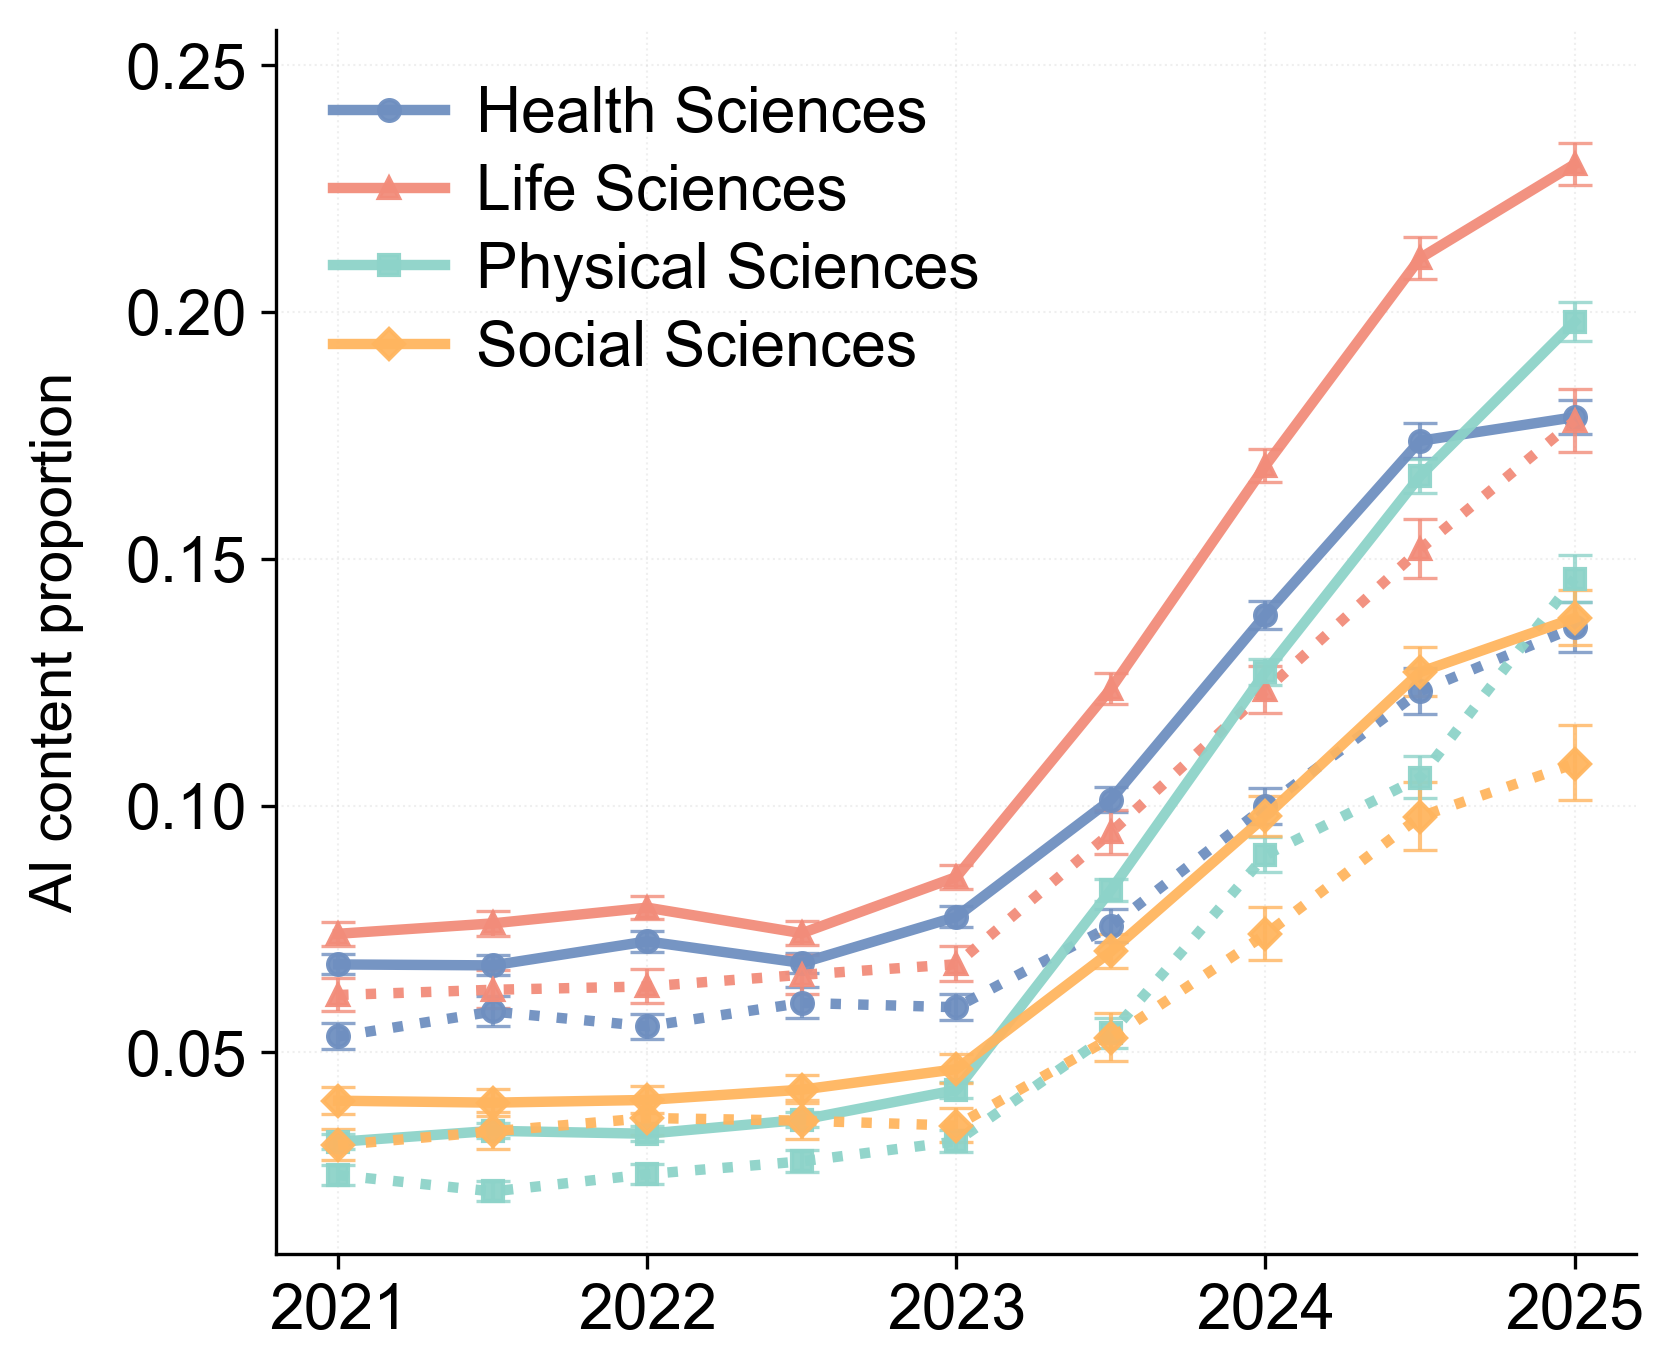

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# Load subject and policy data
policy_domain_path = r"ai_policy/results/mle_res/by_half_year_policy_domain.csv"
policy_domain_data = pd.read_csv(policy_domain_path)

# Four subjects
domains = ['Health Sciences', 'Life Sciences', 'Physical Sciences', 'Social Sciences']

h_order = {'H1': 1, 'H2': 2}

# Get time periods (exclude 2025 H2)
years_halfyears = policy_domain_data[['year', 'half_year']].drop_duplicates()
years_halfyears_sorted = years_halfyears.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in years_halfyears_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_domain_policy(y, h, domain, has_policy):
    row = policy_domain_data[
        (policy_domain_data["year"] == y) & 
        (policy_domain_data["half_year"] == h) & 
        (policy_domain_data["domain_list"] == domain) &
        (policy_domain_data["has_ai_policy"] == has_policy)
    ]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

# Use same color scheme as second code section
colors = {
    'Health Sciences': '#6f8fc0',     # Blue
    'Life Sciences': '#f28c7a',       # Orange-red
    'Physical Sciences': '#8dd3c9',   # Blue
    'Social Sciences': '#ffb55f'      # Orange-red
}

markers = {
    'Health Sciences': 'o',     # Circle
    'Life Sciences': '^',       # Triangle
    'Physical Sciences': 's',   # Square
    'Social Sciences': 'D'      # Diamond
}

# Use same style settings as second code section
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Use same figure size as second code section
fig, ax = plt.subplots(figsize=(6, 5))

# Draw two lines for each subject: with policy and without policy
# 
# Modified plotting section: only add label for first occurrence of each subject
for i, domain in enumerate(domains):
    # Data with policy
    with_policy_data = [pick_domain_policy(y, h, domain, True) for y, h in periods]
    with_policy_mean, with_policy_lo, with_policy_hi = zip(*with_policy_data)
    with_policy_mean = np.array(with_policy_mean, dtype=float)
    
    # Data without policy
    without_policy_data = [pick_domain_policy(y, h, domain, False) for y, h in periods]
    without_policy_mean, without_policy_lo, without_policy_hi = zip(*without_policy_data)
    without_policy_mean = np.array(without_policy_mean, dtype=float)
    
    # Draw line with policy (solid line) - only add subject label for first line
    ax.plot(x, with_policy_mean, marker=markers[domain], markersize=5, linestyle='-', 
            color=colors[domain], label=domain, zorder=4, alpha=0.95)
    ax.errorbar(x, with_policy_mean,
                yerr=[with_policy_mean - np.array(with_policy_lo), 
                      np.array(with_policy_hi) - with_policy_mean],
                fmt='none', capsize=4, capthick=0.8, ecolor=colors[domain],
                elinewidth=1.0, alpha=0.8, zorder=3)
    
    # Draw line without policy (dashed line) - do not add label
    ax.plot(x, without_policy_mean, marker=markers[domain], markersize=5, linestyle=':', 
            color=colors[domain], zorder=4, alpha=0.95)
    ax.errorbar(x, without_policy_mean,
                yerr=[without_policy_mean - np.array(without_policy_lo), 
                      np.array(without_policy_hi) - without_policy_mean],
                fmt='none', capsize=4, capthick=0.8, ecolor=colors[domain],
                elinewidth=1.0, alpha=0.8, zorder=3)

year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

# Use same Y-axis settings as second code section
ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Use same legend settings as second code section
ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, 
          columnspacing=1.5, handlelength=1.8, labelspacing=0.3)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('domain')
plt.show()


Number of data points: 52
Data range: 2021-02-01 00:00:00 to 2025-05-01 00:00:00


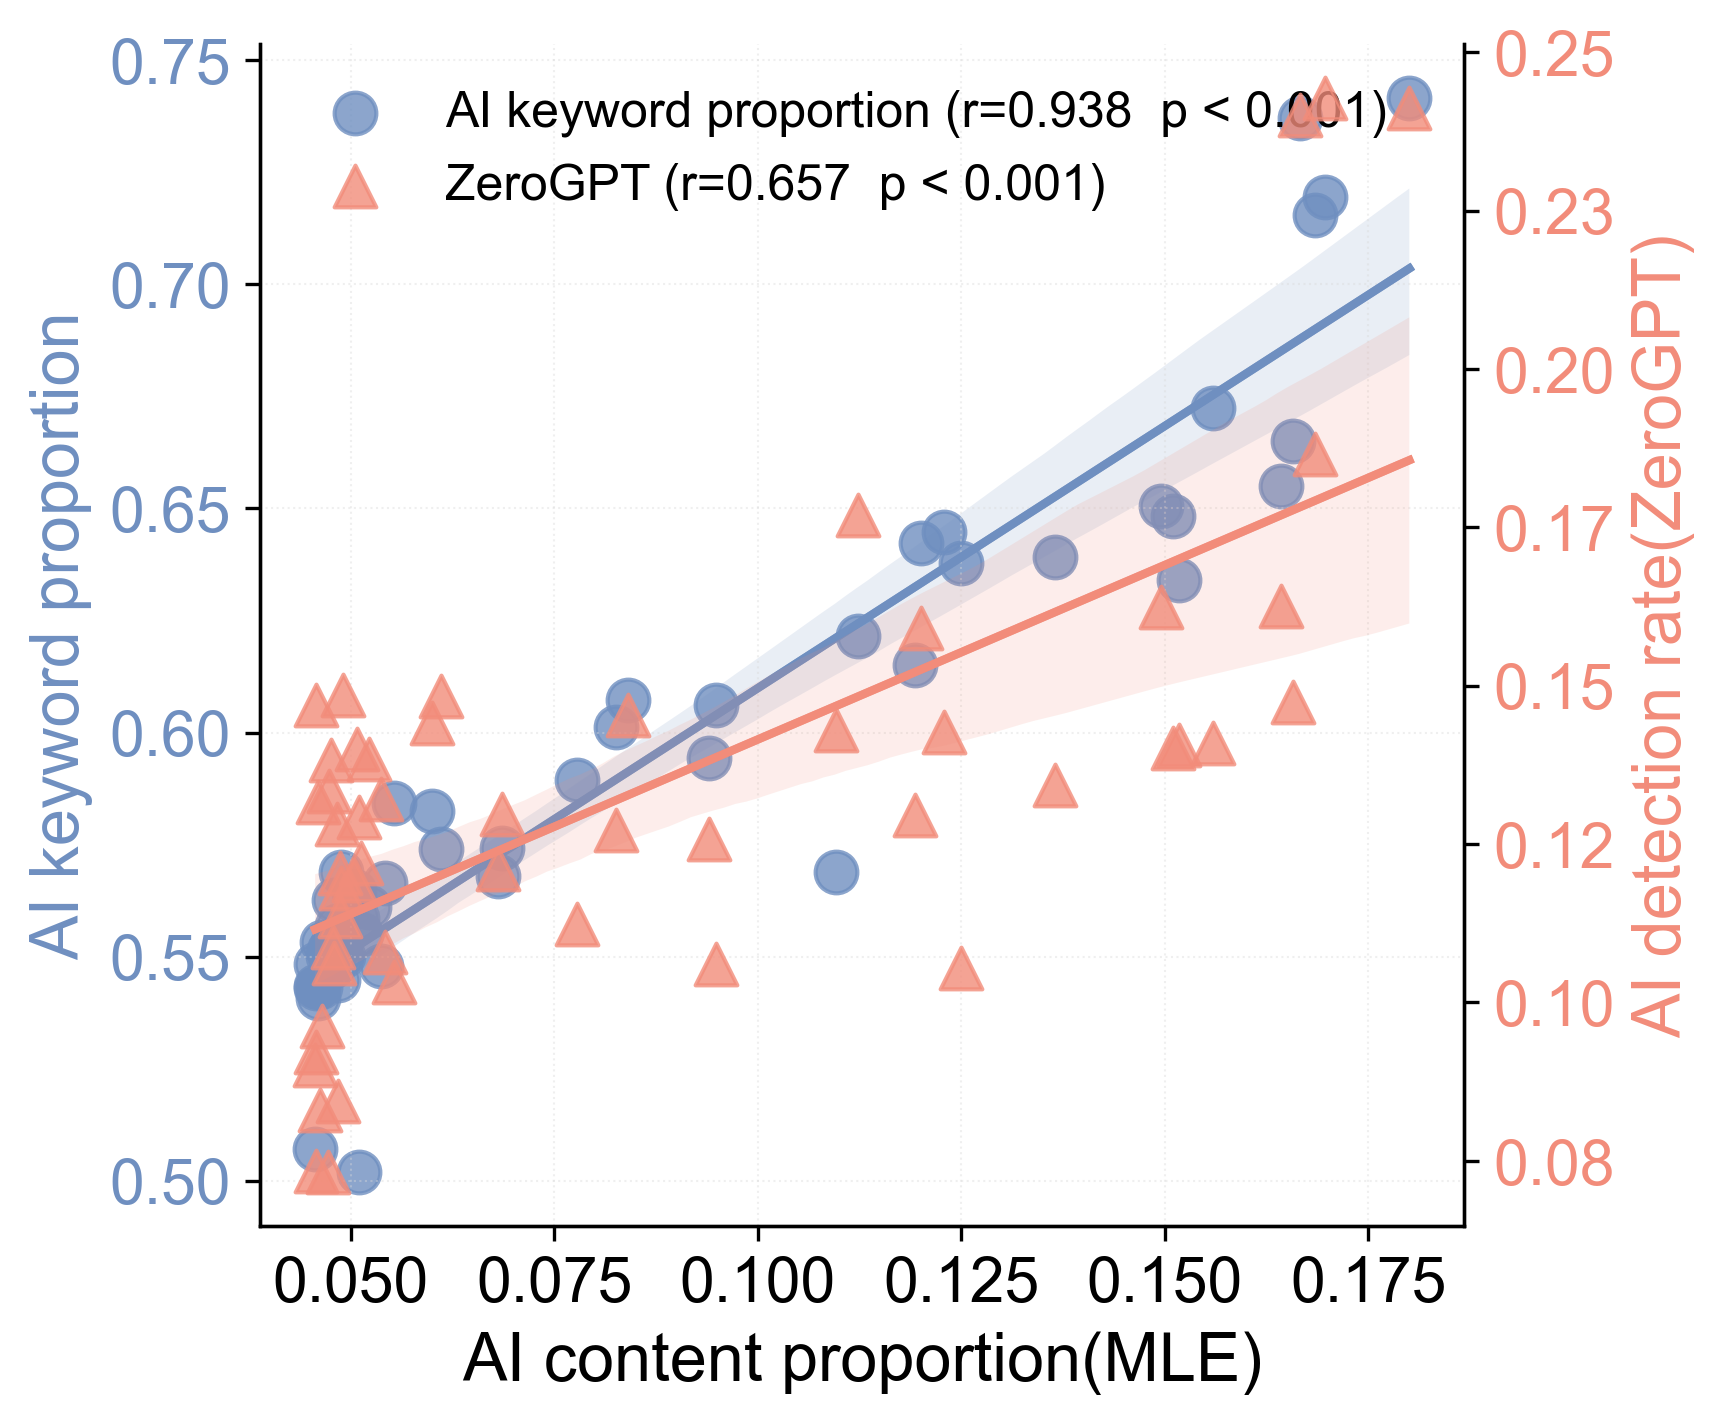

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter
import json
import math

# Set plot style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Function to extract AI rate from detection results
def extract_ai_rate(s):
    if not isinstance(s, str) or s.strip() == "":
        return math.nan
    try:
        obj = json.loads(s)
    except Exception:
        return math.nan
    data = obj.get("data", {}) if isinstance(obj, dict) else {}
    if not isinstance(data, dict):
        return math.nan
    if "fakePercentage" in data and data["fakePercentage"] is not None:
        return float(data["fakePercentage"])
    return math.nan

# Load the first two datasets
keyword_path = r"ai_policy\results\keyword_res\by_month.csv"
mle_path = r"ai_policy\results\mle_res\by_month.csv"

keyword_df = pd.read_csv(keyword_path)
mle_df = pd.read_csv(mle_path)

# Process detection results
detection_path = r"ai_policy\results\detection_results.csv"
detection_df = pd.read_csv(detection_path, dtype={"paper_id": str, "abstract": str, "date": str, "detection_result": str}, low_memory=False)
detection_df["date"] = pd.to_datetime(detection_df["date"], errors="coerce")
detection_df = detection_df.dropna(subset=["date"])
detection_df["ai_rate"] = detection_df["detection_result"].map(extract_ai_rate)/100

# Group detection data by month
detection_df["year"] = detection_df["date"].dt.year
detection_df["month"] = detection_df["date"].dt.month
detection_monthly = detection_df.groupby(["year", "month"], as_index=False)["ai_rate"].mean()
detection_monthly.rename(columns={"ai_rate": "mean_detection"}, inplace=True)

# Merge all three datasets
merged_df = pd.merge(keyword_df, mle_df, on=['year', 'month'], suffixes=('_keyword', '_mle'))
merged_df = pd.merge(merged_df, detection_monthly, on=['year', 'month'], how='inner')

# Filter data from 2021.1 to 2025.6
merged_df = merged_df[(merged_df['year'] >= 2021) & 
                      ~((merged_df['year'] == 2025) & (merged_df['month'] > 6))]

# Sort by date
merged_df['date'] = pd.to_datetime(merged_df['year'].astype(str) + '-' + 
                                   merged_df['month'].astype(str).str.zfill(2) + '-01')
merged_df = merged_df.sort_values('date')

# Remove rows with missing data
merged_df = merged_df.dropna(subset=['mean_keyword', 'mean_mle', 'mean_detection'])

# Apply moving average smoothing to detection data (KEY IMPROVEMENT!)
merged_df['smooth_detection'] = merged_df['mean_detection'].rolling(window=3, center=True).mean()
merged_df = merged_df.dropna(subset=['smooth_detection'])

print(f"Number of data points: {len(merged_df)}")
print("Data range:", merged_df['date'].min(), "to", merged_df['date'].max())

# Calculate correlations (using smoothed detection data)
corr_keyword, p_val_keyword = stats.spearmanr(merged_df['mean_mle'], merged_df['mean_keyword'])
corr_detection, p_val_detection = stats.spearmanr(merged_df['mean_mle'], merged_df['smooth_detection'])

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(6, 5))
ax2 = ax1.twinx()

# Colors for the two methods6
color_keyword = '#6f8fc0'    # Blue
color_detection = '#f28c7a'  # Orange-red
import seaborn as sns
# Plot keyword scatter points
scatter1 = ax1.scatter(merged_df['mean_mle'], merged_df['mean_keyword'], 
                      c=color_keyword, marker='o', s=100, alpha=0.8, 
                      label=f'AI keyword proportion (r={corr_keyword:.3f}  p < 0.001)')

# Plot detection scatter points (using smoothed data)
scatter2 = ax2.scatter(merged_df['mean_mle'], merged_df['smooth_detection'], 
                      c=color_detection, marker='^', s=100, alpha=0.8,
                      label=f'ZeroGPT (r={corr_detection:.3f}  p < 0.001)')

# Fit regression lines
x = merged_df['mean_mle'].values.reshape(-1, 1)
x_smooth = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Keyword regression
y_keyword = merged_df['mean_keyword'].values
model_keyword = LinearRegression().fit(x, y_keyword)
y_smooth_keyword = model_keyword.predict(x_smooth)
ax1.plot(x_smooth, y_smooth_keyword, color=color_keyword, linewidth=2, alpha=0.8)

# Detection regression (using smoothed data)
y_detection = merged_df['smooth_detection'].values
model_detection = LinearRegression().fit(x, y_detection)
y_smooth_detection = model_detection.predict(x_smooth)
ax2.plot(x_smooth, y_smooth_detection, color=color_detection, linewidth=2, alpha=0.8)
import seaborn as sns

# Add to your plotting code
# For keyword data
sns.regplot(x=merged_df['mean_mle'], y=merged_df['mean_keyword'], 
           ax=ax1, scatter=False, color=color_keyword, 
           line_kws={'linewidth': 2}, ci=95)

# For detection data  
sns.regplot(x=merged_df['mean_mle'], y=merged_df['smooth_detection'], 
           ax=ax2, scatter=False, color=color_detection,
           line_kws={'linewidth': 2}, ci=95)
# Set labels and colors
ax1.set_xlabel('AI content proportion(MLE)', fontsize=16)
ax1.set_ylabel('AI keyword proportion', fontsize=16, color=color_keyword)
ax2.set_ylabel('AI detection rate(ZeroGPT)', fontsize=16, color=color_detection)

# Color the y-axis labels
ax1.tick_params(axis='y', labelcolor=color_keyword)
ax2.tick_params(axis='y', labelcolor=color_detection)

# Remove top spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add grid
ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Format axes
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Add correlation statistics
p_keyword_display = "p < 0.001" if p_val_keyword < 0.001 else f"p = {p_val_keyword:.3f}"
p_detection_display = "p < 0.001" if p_val_detection < 0.001 else f"p = {p_val_detection:.3f}"



    # ax1.text(0.03, 0.97, stats_text, transform=ax1.transAxes, fontsize=12,
    #         verticalalignment='top', horizontalalignment='left',
    #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

plt.tight_layout()
save_transparent_figure('correlation')
plt.show()



Number of data points: 52
Data range: 2021-02-01 00:00:00 to 2025-05-01 00:00:00


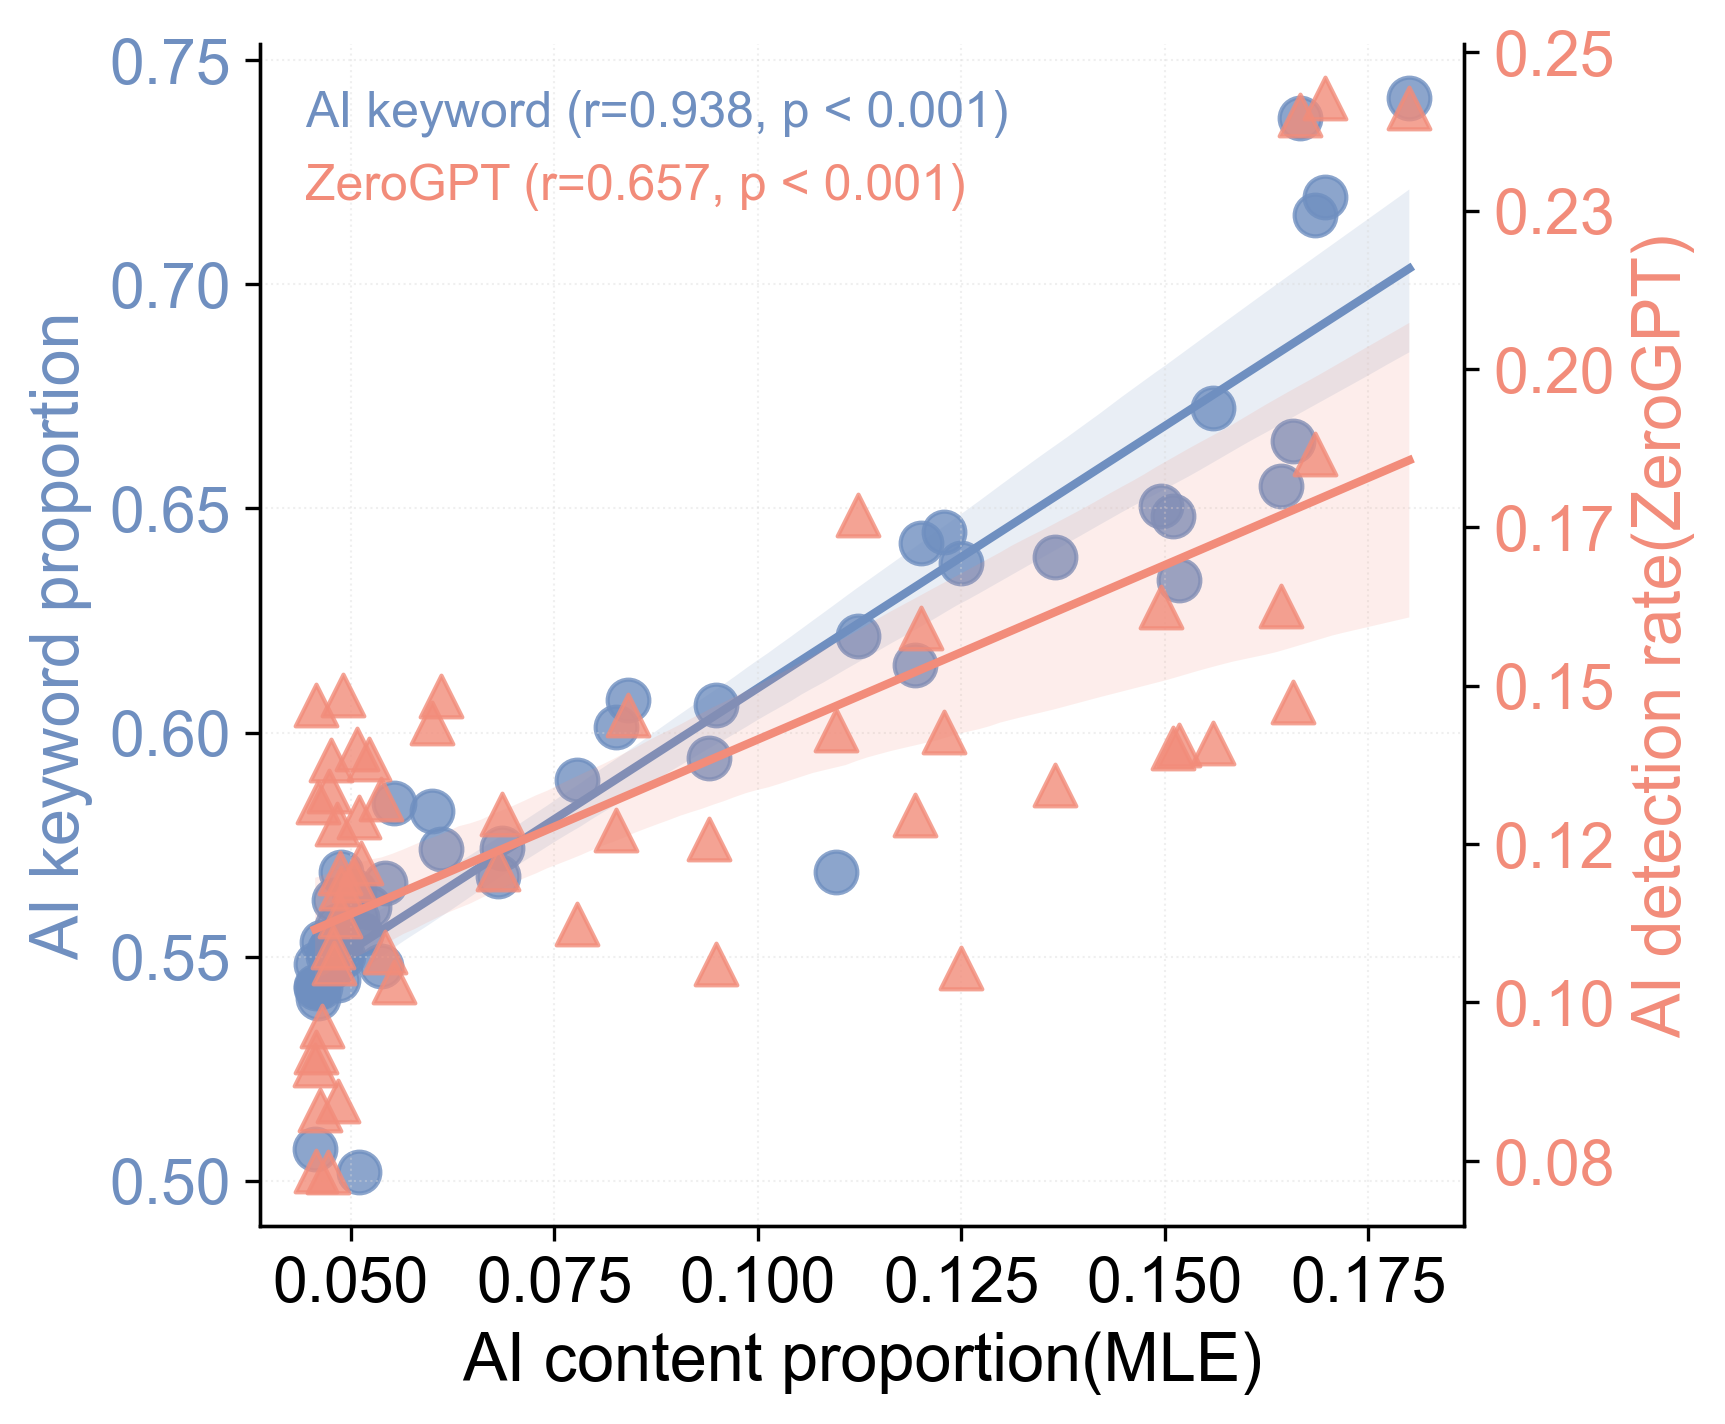

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter
import json
import math
import seaborn as sns

# Set plot style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Function to extract AI rate from detection results
def extract_ai_rate(s):
    if not isinstance(s, str) or s.strip() == "":
        return math.nan
    try:
        obj = json.loads(s)
    except Exception:
        return math.nan
    data = obj.get("data", {}) if isinstance(obj, dict) else {}
    if not isinstance(data, dict):
        return math.nan
    if "fakePercentage" in data and data["fakePercentage"] is not None:
        return float(data["fakePercentage"])
    return math.nan

# Load the first two datasets
keyword_path = r"ai_policy/results/keyword_res/by_month.csv"
mle_path = r"ai_policy/results/mle_res/by_month.csv"

keyword_df = pd.read_csv(keyword_path)
mle_df = pd.read_csv(mle_path)

# Process detection results
detection_path = r"ai_policy/results/detection_results.csv"
detection_df = pd.read_csv(detection_path, dtype={"paper_id": str, "abstract": str, "date": str, "detection_result": str}, low_memory=False)
detection_df["date"] = pd.to_datetime(detection_df["date"], errors="coerce")
detection_df = detection_df.dropna(subset=["date"])
detection_df["ai_rate"] = detection_df["detection_result"].map(extract_ai_rate)/100

# Group detection data by month
detection_df["year"] = detection_df["date"].dt.year
detection_df["month"] = detection_df["date"].dt.month
detection_monthly = detection_df.groupby(["year", "month"], as_index=False)["ai_rate"].mean()
detection_monthly.rename(columns={"ai_rate": "mean_detection"}, inplace=True)

# Merge all three datasets
merged_df = pd.merge(keyword_df, mle_df, on=['year', 'month'], suffixes=('_keyword', '_mle'))
merged_df = pd.merge(merged_df, detection_monthly, on=['year', 'month'], how='inner')

# Filter data from 2021.1 to 2025.6
merged_df = merged_df[(merged_df['year'] >= 2021) & 
                      ~((merged_df['year'] == 2025) & (merged_df['month'] > 6))]

# Sort by date
merged_df['date'] = pd.to_datetime(merged_df['year'].astype(str) + '-' + 
                                   merged_df['month'].astype(str).str.zfill(2) + '-01')
merged_df = merged_df.sort_values('date')

# Remove rows with missing data
merged_df = merged_df.dropna(subset=['mean_keyword', 'mean_mle', 'mean_detection'])

# Apply moving average smoothing to detection data
merged_df['smooth_detection'] = merged_df['mean_detection'].rolling(window=3, center=True).mean()
merged_df = merged_df.dropna(subset=['smooth_detection'])

print(f"Number of data points: {len(merged_df)}")
print("Data range:", merged_df['date'].min(), "to", merged_df['date'].max())

# Calculate correlations (using smoothed detection data)
corr_keyword, p_val_keyword = stats.spearmanr(merged_df['mean_mle'], merged_df['mean_keyword'])
corr_detection, p_val_detection = stats.spearmanr(merged_df['mean_mle'], merged_df['smooth_detection'])

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(6, 5))
ax2 = ax1.twinx()

# Colors for the two methods
color_keyword = '#6f8fc0'    # Blue
color_detection = '#f28c7a'  # Orange-red

# Plot keyword scatter points (without labels)
scatter1 = ax1.scatter(merged_df['mean_mle'], merged_df['mean_keyword'], 
                      c=color_keyword, marker='o', s=100, alpha=0.8)

# Plot detection scatter points (using smoothed data, without labels)
scatter2 = ax2.scatter(merged_df['mean_mle'], merged_df['smooth_detection'], 
                      c=color_detection, marker='^', s=100, alpha=0.8)

# Add regression lines with confidence intervals using seaborn
sns.regplot(x=merged_df['mean_mle'], y=merged_df['mean_keyword'], 
           ax=ax1, scatter=False, color=color_keyword, 
           line_kws={'linewidth': 2}, ci=95)

sns.regplot(x=merged_df['mean_mle'], y=merged_df['smooth_detection'], 
           ax=ax2, scatter=False, color=color_detection,
           line_kws={'linewidth': 2}, ci=95)

# Set labels and colors
ax1.set_xlabel('AI content proportion(MLE)', fontsize=16)
ax1.set_ylabel('AI keyword proportion', fontsize=16, color=color_keyword)
ax2.set_ylabel('AI detection rate(ZeroGPT)', fontsize=16, color=color_detection)

# Color the y-axis labels
ax1.tick_params(axis='y', labelcolor=color_keyword)
ax2.tick_params(axis='y', labelcolor=color_detection)

# Remove top spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add grid
ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Format axes
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Create custom legend with colored text only
p_keyword_display = "p < 0.001" if p_val_keyword < 0.001 else f"p = {p_val_keyword:.3f}"
p_detection_display = "p < 0.001" if p_val_detection < 0.001 else f"p = {p_val_detection:.3f}"

# Create text labels for legend
legend_text = [
    f'AI keyword (r={corr_keyword:.3f}, {p_keyword_display})',
    f'ZeroGPT (r={corr_detection:.3f}, {p_detection_display})'
]

# Add custom legend with colored text
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markersize=0, 
           label=legend_text[0]),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='w', markersize=0, 
           label=legend_text[1])
]

legend = ax1.legend(handles=legend_elements, frameon=False, loc='upper left',
                   handlelength=0, handletextpad=0)

# Set text colors for legend
legend.get_texts()[0].set_color(color_keyword)
legend.get_texts()[1].set_color(color_detection)

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

plt.tight_layout()
save_transparent_figure('correlation')
plt.show()

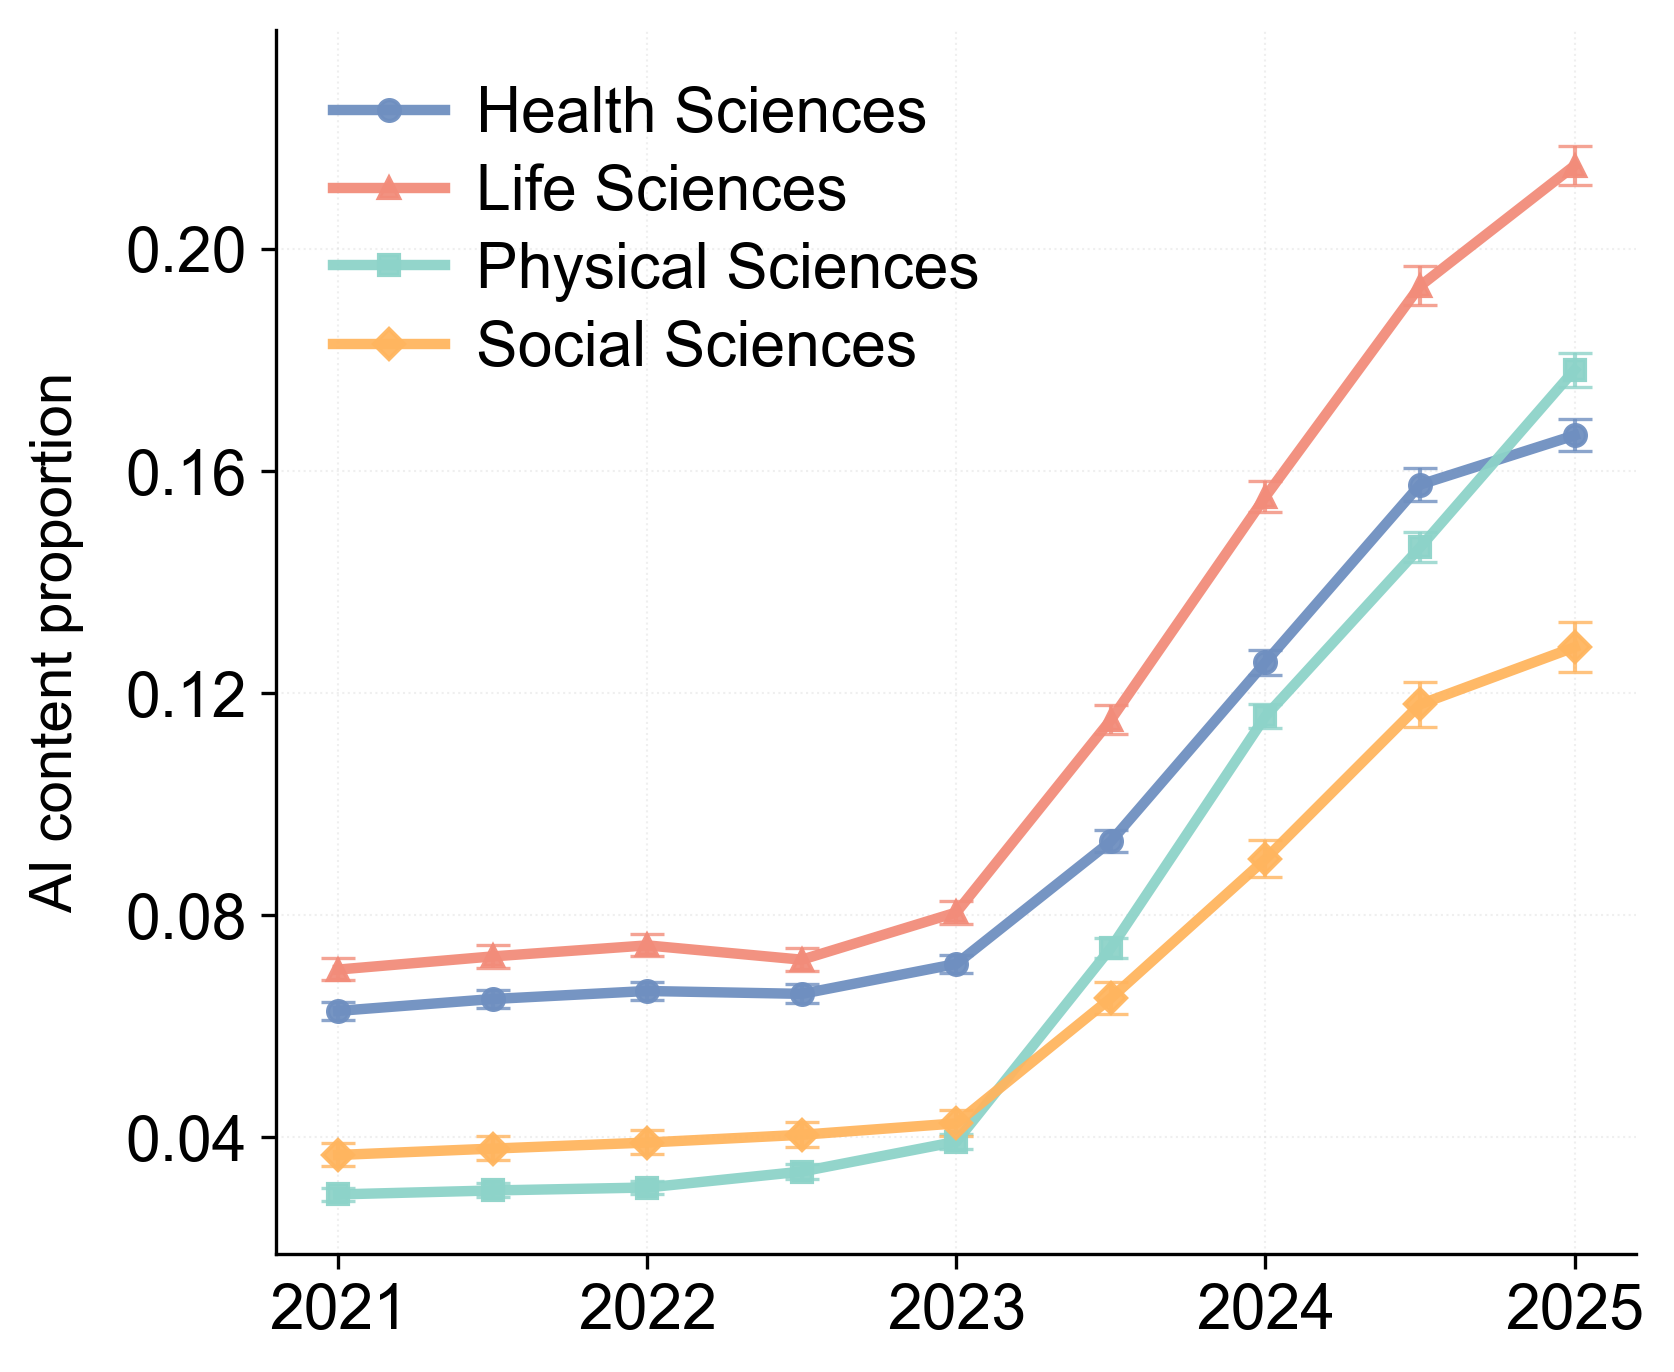

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

domain_path = r"ai_policy/results/mle_res/by_half_year_domain.csv"
domain_data = pd.read_csv(domain_path)

domains = ['Health Sciences', 'Life Sciences', 'Physical Sciences', 'Social Sciences']

h_order = {'H1': 1, 'H2': 2}

years_halfyears = domain_data[['year', 'half_year']].drop_duplicates()
years_halfyears_sorted = years_halfyears.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in years_halfyears_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_domain_data(y, h, domain):
    row = domain_data[
        (domain_data["year"] == y) & 
        (domain_data["half_year"] == h) & 
        (domain_data["domain_list"] == domain)
    ]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

colors = {
    'Health Sciences': '#6f8fc0',     
    'Life Sciences': '#f28c7a',       
    'Physical Sciences': '#8dd3c9',   
    'Social Sciences': '#ffb55f'      
}

markers = {
    'Health Sciences': 'o',     
    'Life Sciences': '^',       
    'Physical Sciences': 's',   
    'Social Sciences': 'D'      
}

plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

fig, ax = plt.subplots(figsize=(6, 5))

for domain in domains:
    domain_data_points = [pick_domain_data(y, h, domain) for y, h in periods]
    domain_mean, domain_lo, domain_hi = zip(*domain_data_points)
    domain_mean = np.array(domain_mean, dtype=float)
    
    ax.plot(x, domain_mean, marker=markers[domain], markersize=5, linestyle='-', 
            color=colors[domain], label=domain, zorder=4, alpha=0.95)
    
    ax.errorbar(x, domain_mean,
                yerr=[domain_mean - np.array(domain_lo), 
                      np.array(domain_hi) - domain_mean],
                fmt='none', capsize=4, capthick=0.8, ecolor=colors[domain],
                elinewidth=1.0, alpha=0.8, zorder=3)

year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, 
          columnspacing=1.5, handlelength=1.8, labelspacing=0.3)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

save_transparent_figure('domain_new')
plt.show()

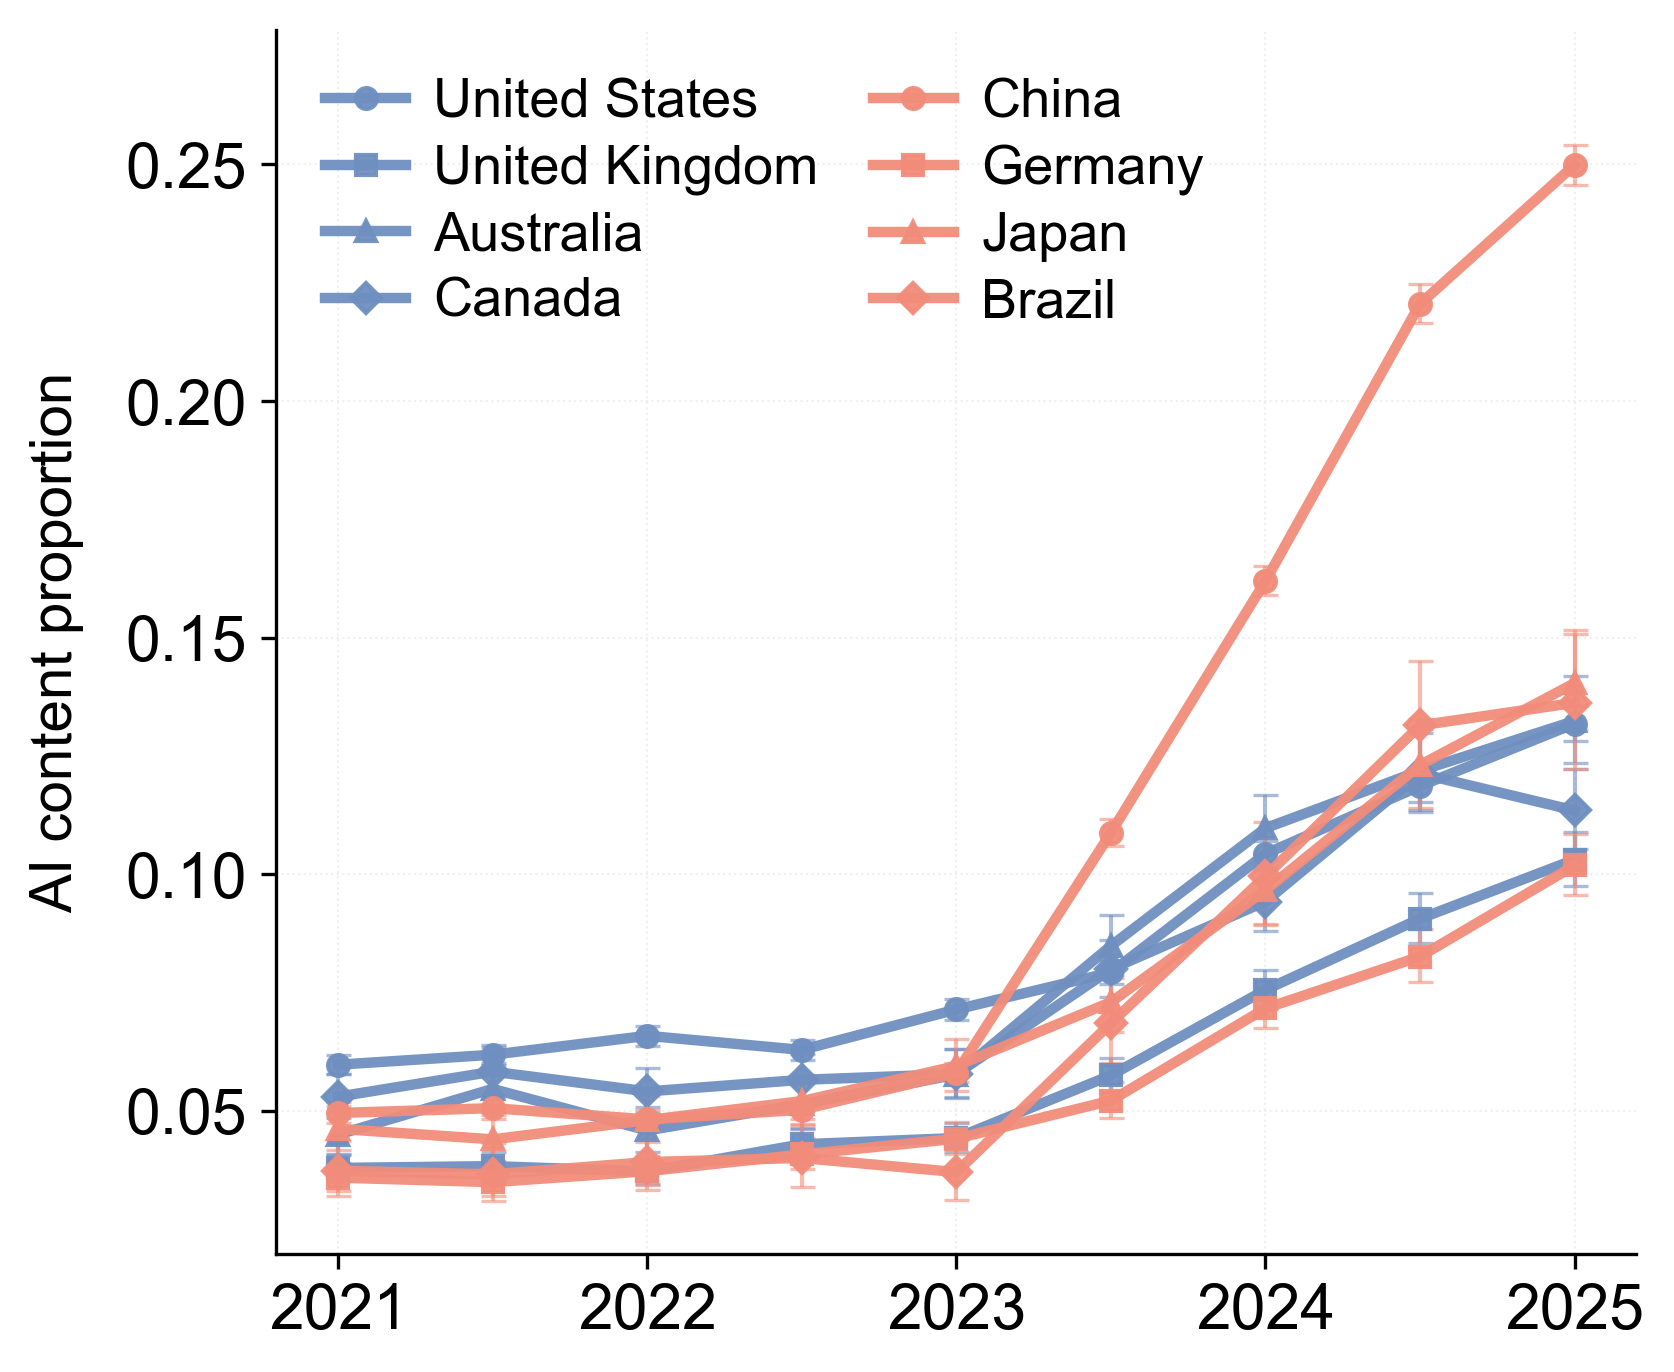

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# Load country data
country_path = r"ai_policy/results/mle_res/by_half_year_country.csv"
country_data = pd.read_csv(country_path)

# Define target countries and their corresponding country codes
target_countries = {
    # English-speaking countries
    'US': 'English',    # United States
    'GB': 'English',    # United Kingdom  
    'AU': 'English',    # Australia
    'CA': 'English',    # Canada
    # Non-English-speaking countries
    'CN': 'Non-English',    # China
    'DE': 'Non-English',    # Germany
    'JP': 'Non-English',    # Japan
    'BR': 'Non-English'     # Brazil
}

# Country name mapping (for display)
country_names = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'AU': 'Australia', 
    'CA': 'Canada',
    'CN': 'China',
    'DE': 'Germany',
    'JP': 'Japan',
    'BR': 'Brazil'
}

h_order = {'H1': 1, 'H2': 2}

# Get time periods (exclude 2025 H2)
years_halfyears = country_data[['year', 'half_year']].drop_duplicates()
years_halfyears_sorted = years_halfyears.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in years_halfyears_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_country_data(y, h, country_code):
    """Extract data for specific country"""
    row = country_data[
        (country_data["year"] == y) & 
        (country_data["half_year"] == h) & 
        (country_data["country_list"] == country_code)
    ]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

# Color settings
colors = {'English': '#6f8fc0', 'Non-English': '#f28c7a'}

# Assign different markers for each country
markers = {
    'US': 'o',    # Circle
    'GB': 's',    # Square
    'AU': '^',    # Triangle
    'CA': 'D',    # Diamond
    'CN': 'o',    # Circle
    'DE': 's',    # Square
    'JP': '^',    # Triangle
    'BR': 'D'     # Diamond
}

# Style settings
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Create figure
fig, ax = plt.subplots(figsize=(6, 5))

# Draw one line for each country
for country_code, language_group in target_countries.items():
    # Extract data for this country
    country_data_points = [pick_country_data(y, h, country_code) for y, h in periods]
    country_mean, country_lo, country_hi = zip(*country_data_points)
    country_mean = np.array(country_mean, dtype=float)
    
    # Draw line
    country_name = country_names[country_code]
    ax.plot(x, country_mean, marker=markers[country_code], markersize=5, linestyle='-', 
            color=colors[language_group], label=country_name, zorder=4, alpha=0.95)
    
    # Add error bars
    ax.errorbar(x, country_mean,
                yerr=[country_mean - np.array(country_lo), 
                      np.array(country_hi) - country_mean],
                fmt='none', capsize=3, capthick=0.8, ecolor=colors[language_group],
                elinewidth=1.0, alpha=0.6, zorder=3)

# Set X-axis labels
year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

# Set Y-axis and style
ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Set legend - two columns, grouped by English and non-English countries
handles, labels = ax.get_legend_handles_labels()

# Reorder legend: English countries first, then non-English countries
english_items = [(h, l) for h, l in zip(handles, labels) if l in ['United States', 'United Kingdom', 'Australia', 'Canada']]
non_english_items = [(h, l) for h, l in zip(handles, labels) if l in ['China', 'Germany', 'Japan', 'Brazil']]

# Combine and create legend
all_handles = [h for h, l in english_items] + [h for h, l in non_english_items]
all_labels = [l for h, l in english_items] + [l for h, l in non_english_items]

ax.legend(all_handles, all_labels, frameon=False, loc='upper left', ncol=2, 
          handletextpad=0.5, columnspacing=1.0, handlelength=1.5, labelspacing=0.3)

# Adjust Y-axis range
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)

# Function to save figure
def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

save_transparent_figure('country_trends')
plt.show()

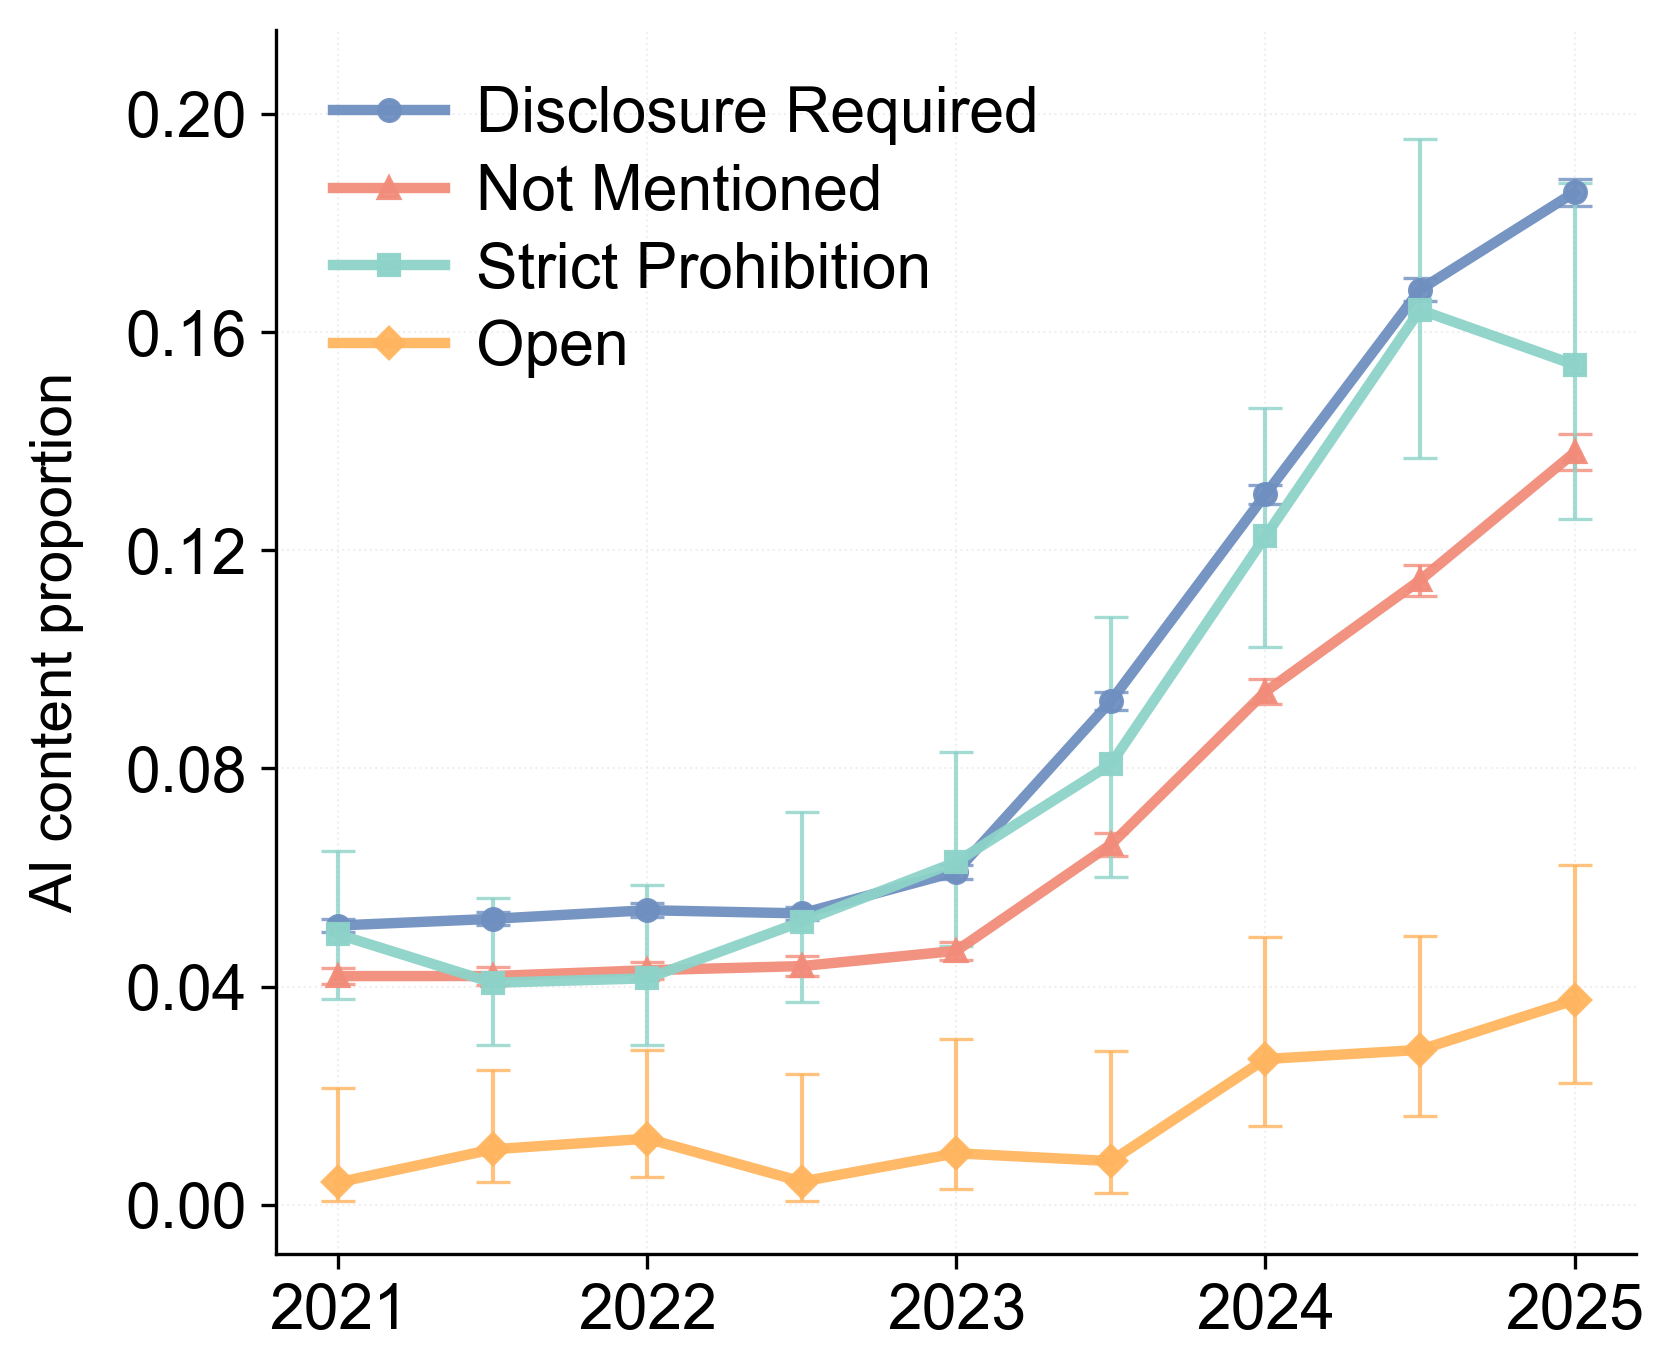

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# Load subject data (without policy grouping)
domain_path = r"ai_policy/results/mle_res/by_half_year_policy_category.csv"
domain_data = pd.read_csv(domain_path)

# Four policy categories
domains = ['Disclosure Required', 'Not Mentioned','Strict Prohibition','Open']

h_order = {'H1': 1, 'H2': 2}

# Get time periods (exclude 2025 H2)
years_halfyears = domain_data[['year', 'half_year']].drop_duplicates()
years_halfyears_sorted = years_halfyears.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in years_halfyears_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_domain_data(y, h, domain):
    """Extract data for specific policy category"""
    row = domain_data[
        (domain_data["year"] == y) & 
        (domain_data["half_year"] == h) & 
        (domain_data["policy_category"] == domain)
    ]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

# Redefine color scheme - matching policy categories
colors = {
    'Disclosure Required': '#6f8fc0',     # Blue
    'Not Mentioned': '#f28c7a',           # Orange-red
    'Strict Prohibition': '#8dd3c9',      # Cyan
    'Open': '#ffb55f'                     # Orange-yellow
}

markers = {
    'Disclosure Required': 'o',     # Circle
    'Not Mentioned': '^',           # Triangle
    'Strict Prohibition': 's',      # Square
    'Open': 'D'                     # Diamond
}

# Style settings
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

# Create figure
fig, ax = plt.subplots(figsize=(6, 5))

# Draw one line for each policy category
for domain in domains:
    # Extract data for this policy category
    domain_data_points = [pick_domain_data(y, h, domain) for y, h in periods]
    domain_mean, domain_lo, domain_hi = zip(*domain_data_points)
    domain_mean = np.array(domain_mean, dtype=float)
    
    # Draw line
    ax.plot(x, domain_mean, marker=markers[domain], markersize=5, linestyle='-', 
            color=colors[domain], label=domain, zorder=4, alpha=0.95)
    
    # Add error bars
    ax.errorbar(x, domain_mean,
                yerr=[domain_mean - np.array(domain_lo), 
                      np.array(domain_hi) - domain_mean],
                fmt='none', capsize=4, capthick=0.8, ecolor=colors[domain],
                elinewidth=1.0, alpha=0.8, zorder=3)

# Set X-axis labels
year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

# Set Y-axis and style
ax.set_ylabel('AI content proportion', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

# Set legend
ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, 
          columnspacing=1.5, handlelength=1.8, labelspacing=0.3)

# Adjust Y-axis range
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)

# Function to save figure
def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

save_transparent_figure('category_new')
plt.show()